In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ast
# create client instance
from advisor_client.client import *
client = AdvisorClient()

In [2]:
# get study
study_name = "optimal_jump1"
study = client.get_study_by_name(study_name)
print(study)

Id: 2, name: optimal_jump2, study_configuration: {"randomInitTrials": 10, "params": [{"parameterName": "jump_a", "type": "DOUBLE", "maxValue": 20.0, "minValue": -20.0}, {"parameterName": "jump_b", "type": "DOUBLE", "maxValue": 20.0, "minValue": -20.0}, {"parameterName": "jump_c", "type": "DOUBLE", "maxValue": 20.0, "minValue": -20.0}, {"parameterName": "jump_d", "type": "DOUBLE", "maxValue": 20.0, "minValue": -20.0}, {"parameterName": "opt_vel", "type": "DOUBLE", "maxValue": 5.0, "minValue": 3.0}], "goal": "MINIMIZE"}, algorithm: BayesianOptimization


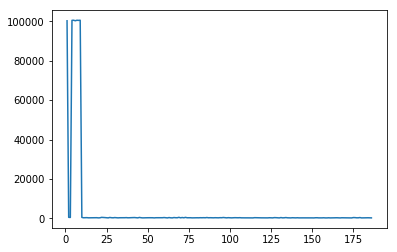

best trial: Id: 269, study_name: optimal_jump2, name: BayesianOptimizationTrial, parameter_values: {"opt_vel": 4.275444916487349, "jump_d": 13.844755047281893, "jump_c": 19.86846443945869, "jump_b": -12.39499126247611, "jump_a": -1.7949093954473092}, objective_value: 260.405797975


In [3]:
# plot training curve
train_curve = []
if client.is_study_done(study_name):
    trials = client.list_trials(study_name)
    for trial in trials:
        trial_metrics = client.list_trial_metrics(study_name,trial.id)
        for metrics in trial_metrics:
            train_curve.append(metrics.objective_value)
plt.plot(range(1,len(train_curve)+1),train_curve)
plt.show()
best_trial = client.get_best_trial(study_name)
print("best trial: {}".format(best_trial))

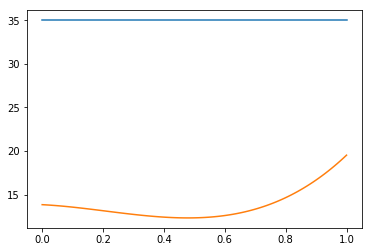

{'opt_vel': 4.275444916487349, 'jump_d': 13.844755047281893, 'jump_c': 19.86846443945869, 'jump_b': -12.39499126247611, 'jump_a': -1.7949093954473092}


In [4]:
param_dic = ast.literal_eval(best_trial.parameter_values)
a = param_dic["jump_a"]
b = param_dic["jump_b"]
c = param_dic["jump_c"]
d = param_dic["jump_d"]
t = np.linspace(0,1,100)
y_constant = 35*np.ones_like(t)
y_poly = (a * t + b * t ** 2 + c * t ** 3 +d)
plt.plot(t,y_constant)
plt.plot(t,y_poly)
plt.show()
print(param_dic)

In [5]:
with open("../controllers/my_controller_python/args.txt",'w') as f1:
    f1.write(str(param_dic))
os.system('webots --mode=run')
with open("../controllers/my_controller_python/metrics.txt",'r') as f2:
    metrics_dic = eval(f2.read())
    y = metrics_dic["jump_metrics"]
print(y)

431.106335257
